In [1]:
#%matplotlib notebook
import scipy.stats
import numpy as np

import matplotlib
import torch

%matplotlib inline
%load_ext autoreload
%autoreload 2

#%env PYTORCH_TRANSFORMERS_CACHE="/mnt/nfs/work1/mccallum/hschang/pytorch_cache"

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [55]:
result_file_1 = "../gen_log/wiki2021_medium_n6_3x3_even_last_2_top20_bptt196"
#result_file_2 = "../gen_log/wiki2021_n1_1x1_top20_bptt196"
result_file_3 = "../gen_log/wiki2021_medium_n3_1x1_top20_bptt196"
result_file_4 = "../gen_log/wiki2021_medium_n1_3x3_top20_bptt196"
result_file_5 = "../gen_log/wiki2021_medium_n3_3x3_top20_bptt196"


def load_result_file(result_file_name):
    top_k_prob_list = []
    top_k_idx_list = []
    top_k_prob_single_list = []
    top_k_idx_single_list = []
    with open(result_file_name) as f_in:
        results_list = []
        for line in f_in:
            fields = line.rstrip().split()
            recording_num = 22
            input_idx, loss, reconstruction_err, reconstruction_norm_err, top_k_div, top_k_div_norm, pred_div, pred_div_sq_weight, target_norm, top_k_mag, top_entropy, eig_vals_min, eig_vals_prod, eig_vals_min_norm, eig_vals_prod_norm, collapse_diff, collapse_diff_inv, collapse_diff_val, facet_norm, top_four_dist, LID_avg, LID_avg_norm = fields[:recording_num]
            top_k_num = int((len(fields) - recording_num )/4)
            top_k_idx_list.append(fields[recording_num:recording_num+top_k_num])
            top_k_prob_list.append(fields[recording_num+top_k_num:recording_num+2*top_k_num])
            top_k_idx_single_list.append(fields[recording_num+2*top_k_num:recording_num+3*top_k_num])
            top_k_prob_single_list.append(fields[recording_num+3*top_k_num:])
            
            results_list.append( [int(input_idx), float(loss), float(reconstruction_err), float(reconstruction_norm_err), float(top_k_div), float(top_k_div_norm), float(pred_div), float(pred_div_sq_weight), float(target_norm), float(top_k_mag), float(top_entropy), float(eig_vals_min), float(eig_vals_prod), float(eig_vals_min_norm), float(eig_vals_prod_norm), float(collapse_diff), float(collapse_diff_inv), float(collapse_diff_val), float(facet_norm), float(top_four_dist), float(LID_avg), float(LID_avg_norm)])
    input_idx_list, loss_list, reconstruction_err_list, reconstruction_norm_err_list, top_k_div_list, top_k_div_norm_list, pred_div_list, pred_div_sq_weight_list, target_norm_list, top_k_mag_list, top_entropy_list, eig_vals_min_list, eig_vals_prod_list, eig_vals_min_norm_list, eig_vals_prod_norm_list, collapse_diff_list, collapse_diff_inv_list, collapse_diff_val_list, facet_norm_list, top_four_dist_list, LID_avg_list, LID_avg_norm_list = zip(*results_list)
#    label_idx_list = input_idx_list[1:]
#    return label_idx_list, top_k_idx_list[:-1], top_k_prob_list[:-1], np.array(loss_list[:-1]), np.array(reconstruction_err_list[:-1]), np.array(reconstruction_norm_err_list[:-1]), np.array(top_k_div_list[:-1]), np.array(top_k_div_norm_list[:-1]), np.array(pred_div_list[:-1]), np.array(target_norm_list[:-1]), np.array(top_k_mag[:-1]), np.array(top_entropy[:-1])
    return input_idx_list, top_k_idx_list, top_k_prob_list, top_k_idx_single_list, top_k_prob_single_list, np.array(loss_list), np.array(reconstruction_err_list), np.array(reconstruction_norm_err_list), np.array(top_k_div_list), np.array(top_k_div_norm_list), np.array(pred_div_list), np.array(pred_div_sq_weight_list), np.array(target_norm_list), np.array(top_k_mag_list), np.array(top_entropy_list), np.array(eig_vals_min_list), np.array(eig_vals_prod_list), np.array(eig_vals_min_norm_list), np.array(eig_vals_prod_norm_list), np.array(collapse_diff_list), np.array(collapse_diff_inv_list), np.array(collapse_diff_val_list), np.array(facet_norm_list), np.array(top_four_dist_list), np.array(LID_avg_list), np.array(LID_avg_norm_list)

label_idx_mpi2, top_k_idx_mpi2, top_k_prob_list_mpi2, top_k_idx_single_mpi2, top_k_prob_list_single_mpi2, loss_mpi2, reconstruction_err_mpi2, reconstruction_norm_err_mpi2, top_k_div_mpi2, top_k_div_norm_mpi2, pred_div_mpi2, pred_div_sq_weight_mpi2, target_norm_mpi2, top_k_mag_mpi2, top_entropy_mpi2, eig_vals_min_mpi2, eig_vals_prod_mpi2, eig_vals_min_norm_mpi2, eig_vals_prod_norm_mpi2, collapse_diff_mpi2, collapse_diff_inv_mpi2, collapse_diff_val_mpi2, facet_norm_mpi2, top_four_dist_mpi2, LID_avg_mpi2, LID_avg_norm_mpi2 = load_result_file(result_file_1)
#label_idx_soi2, top_k_idx_soi2, top_k_prob_list_soi2, top_k_idx_single_soi2, top_k_prob_list_single_soi2, loss_soi2, reconstruction_err_soi2, reconstruction_norm_err_soi2, top_k_div_soi2, top_k_div_norm_soi2, pred_div_soi2, pred_div_sq_weight_soi2, target_norm_soi2, top_k_mag_soi2, top_entropy_soi2, eig_vals_min_soi2, eig_vals_prod_soi2, eig_vals_min_norm_soi2, eig_vals_prod_norm_soi2, collapse_diff_soi2, collapse_diff_inv_soi2, collapse_diff_val_soi2, facet_norm_soi2, top_four_dist_soi2, LID_avg_soi2, LID_avg_norm_soi2 = load_result_file(result_file_2)
label_idx_myi2, top_k_idx_myi2, top_k_prob_list_myi2, top_k_idx_single_myi2, top_k_prob_list_single_myi2, loss_myi2, reconstruction_err_myi2, reconstruction_norm_err_myi2, top_k_div_myi2, top_k_div_norm_myi2, pred_div_myi2, pred_div_sq_weight_myi2, target_norm_myi2, top_k_mag_myi2, top_entropy_myi2, eig_vals_min_myi2, eig_vals_prod_myi2, eig_vals_min_norm_myi2, eig_vals_prod_norm_myi2, collapse_diff_myi2, collapse_diff_inv_myi2, collapse_diff_val_myi2, facet_norm_myi2, top_four_dist_myi2, LID_avg_myi2, LID_avg_norm_myi2 = load_result_file(result_file_3)
label_idx_shi2, top_k_idx_shi2, top_k_prob_list_shi2, top_k_idx_single_shi2, top_k_prob_list_single_shi2, loss_shi2, reconstruction_err_shi2, reconstruction_norm_err_shi2, top_k_div_shi2, top_k_div_norm_shi2, pred_div_shi2, pred_div_sq_weight_shi2, target_norm_shi2, top_k_mag_shi2, top_entropy_shi2, eig_vals_min_shi2, eig_vals_prod_shi2, eig_vals_min_norm_shi2, eig_vals_prod_norm_shi2, collapse_diff_shi2, collapse_diff_inv_shi2, collapse_diff_val_shi2, facet_norm_shi2, top_four_dist_shi2, LID_avg_shi2, LID_avg_norm_shi2 = load_result_file(result_file_4)
label_idx_mhi2, top_k_idx_mhi2, top_k_prob_list_mhi2, top_k_idx_single_mhi2, top_k_prob_list_single_mhi2, loss_mhi2, reconstruction_err_mhi2, reconstruction_norm_err_mhi2, top_k_div_mhi2, top_k_div_norm_mhi2, pred_div_mhi2, pred_div_sq_weight_mhi2, target_norm_mhi2, top_k_mag_mhi2, top_entropy_mhi2, eig_vals_min_mhi2, eig_vals_prod_mhi2, eig_vals_min_norm_mhi2, eig_vals_prod_norm_mhi2, collapse_diff_mhi2, collapse_diff_inv_mhi2, collapse_diff_val_mhi2, facet_norm_mhi2, top_four_dist_mhi2, LID_avg_mhi2, LID_avg_norm_mhi2 = load_result_file(result_file_5)


In [3]:
from gpt2_model.tokenization_gpt2 import GPT2Tokenizer

tokenizer_GPT2 = GPT2Tokenizer.from_pretrained('gpt2')


stop_word_file = '../resources/stop_word_list'

def convert_stop_to_ind(f_in):
    stop_word_set = set()
    for line in f_in:
        w = line.rstrip()
        stop_word_set.add('ġ'+w)
    return stop_word_set

with open(stop_word_file) as f_in:
    stop_word_set = convert_stop_to_ind(f_in)
#print(stop_word_set)

vocab_map = dict(tokenizer_GPT2.encoder, **tokenizer_GPT2.added_tokens_encoder)
vocab_size = len(vocab_map)
idxl2token = ['']*vocab_size
non_stop_idx_set = set()
for w in vocab_map:
    idx = vocab_map[w]
    idxl2token[idx] = w
    if w.lower() not in stop_word_set:
        non_stop_idx_set.add(idx)

#print(idxl2token)
        
        
stop_idx_1 = []
non_stop_idx_1 = []
for i in range(len(label_idx_1)):
    if label_idx_1[i] in non_stop_idx_set:
        non_stop_idx_1.append(i)
    else:
        stop_idx_1.append(i)

print(len(stop_idx_1))
print(len(non_stop_idx_1))

NameError: name 'label_idx_1' is not defined

In [4]:
def vis_extreme(loss_diff, mask):
    sorted_idx = np.argsort(-loss_diff)
    mask_idx = set(np.where(mask)[0].tolist())
    #print(mask_idx)
    top_example_num = min(30,loss_diff.size)
    show_text_win_size = 50

    count = 0
    for i in range(len(sorted_idx)):#top_example_num):
        idx = sorted_idx[i]
        if idx not in mask_idx:
            continue
        count += 1
        if count > top_example_num:
            break
        print(loss_diff[idx])
        print(loss_shi2[idx])
        print(loss_mpi2[idx])
        print(reconstruction_err_shi2[idx])
        print(target_norm_shi2[idx])
        print(top_k_div_norm_shi2[idx])
        print(facet_norm_shi2[idx])
        print(collapse_diff_mhi2[idx])
        print(pred_div_sq_weight_mhi2[idx])
        print(tokenizer_GPT2.decode(label_idx_shi2[idx-show_text_win_size:idx]))
        print(tokenizer_GPT2.decode(label_idx_shi2[idx:idx+show_text_win_size]))
        print('|'.join([idxl2token[int(x)]+' '+str(prob) for x, prob in zip(top_k_idx_shi2[idx],top_k_prob_list_shi2[idx])]))
        print('|'.join([idxl2token[int(x)]+' '+str(prob) for x, prob in zip(top_k_idx_mpi2[idx],top_k_prob_list_mpi2[idx])]))
        print('|'.join([idxl2token[int(x)]+' '+str(prob) for x, prob in zip(top_k_idx_single_mpi2[idx],top_k_prob_list_single_mpi2[idx])]))
        #print('|'.join([idxl2token[int(x)] for x in top_k_idx_2[idx]]))
        

#loss_diff = loss_1 - loss_2
#loss_diff = top_k_div_norm_sc/collapse_diff_mc
#loss_diff = loss_shi2 - loss_mpi2
loss_diff = loss_shi2 - loss_mhi2
#loss_diff = -eig_vals_min_norm_mc/top_k_div_norm_mc*collapse_diff_mc
#loss_diff = -top_four_dist_mi
#mask = collapse_diff_mc > 0
mask = eig_vals_min_norm_shi2/top_k_div_norm_shi2 < 0.2
#mask = (collapse_diff_mpi2 < 0.8) & (loss_mpi2 < 4 )
#mask = top_four_dist_mi < 0.3
vis_extreme(loss_diff, mask)

1.9637031555175781
4.4810662269592285
2.7175886631011963
2.7375426292419434
3.4509494304656982
0.7443969249725342
24.07781982421875
0.9998770952224731
0.06575734913349152
ÏÎ¿Î¼Î¹ÎºÎ® ÎÎ¿Î¼ÏÎ±Î½Î¯Î±
",Retrograde Company") and in 1981 she had her first guest appearance on a CD, by being featured in the album of Vangelis Germanos titled "Ta Barakia". She broke away from the group and started a solo career in 1984
Ã 0.7867767810821533|ĠÃ 0.0662623792886734|"). 0.039528071880340576|") 0.028588052839040756|"), 0.02786390669643879|" 0.0119867455214262|", 0.011321327649056911|Ã¡ 0.003484755754470825|". 0.002145912265405059|ĠK 0.0015326383290812373|, 0.0015008688205853105|Ġ" 0.0012198981130495667|"; 0.0011667439248412848|k 0.0011216336861252785|"); 0.0005132821388542652|- 0.0004647606110665947|), 0.0004546176642179489|) 0.0004311569209676236|Ġ- 0.00040263778646476567|ÃĤ 0.00035849944106303155
Ã 0.42808592319488525|ĠÃ 0.14007660746574402|"), 0.0766943097114563|"). 0.06754942983388901|", 0.066

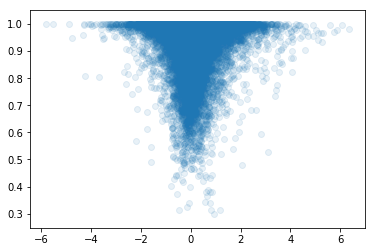

In [56]:
fig = plt.figure()
mask = top_k_div_norm_shi2 > 0
plt.scatter(loss_shi2[mask] - loss_mhi2[mask], collapse_diff_mhi2[mask], alpha = 0.1)

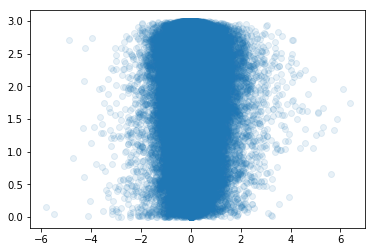

In [51]:
fig = plt.figure()
mask = top_k_div_norm_shi2 > 0
plt.scatter(loss_shi2[mask] - loss_mhi2[mask], top_entropy_mhi2[mask], alpha = 0.1)

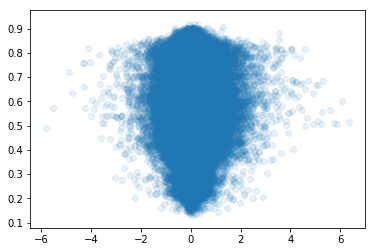

In [6]:
fig = plt.figure()
mask = top_k_div_norm_shi2 > 0
plt.scatter(loss_shi2[mask] - loss_mhi2[mask], eig_vals_min_norm_shi2[mask]/top_k_div_norm_shi2[mask], alpha = 0.1)


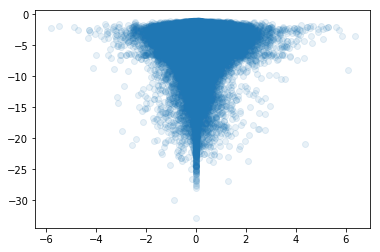

In [44]:
fig = plt.figure()
mask = top_k_div_norm_shi2 > 0
plt.scatter(loss_shi2[mask] - loss_mhi2[mask], LID_avg_mhi2[mask], alpha = 0.1)

#, LID_avg_norm_mpi2

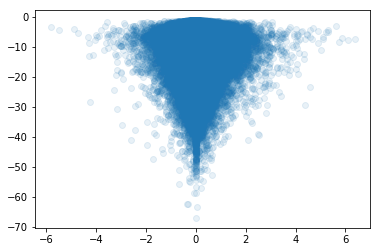

In [45]:
fig = plt.figure()
mask = top_k_div_norm_shi2 > 0
plt.scatter(loss_shi2[mask] - loss_mhi2[mask], LID_avg_norm_mpi2[mask], alpha = 0.1)


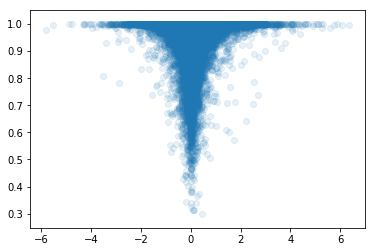

In [7]:
fig = plt.figure()
mask = top_k_div_norm_shi2 > 0
plt.scatter(loss_shi2[mask] - loss_mhi2[mask], collapse_diff_mhi2[mask], alpha = 0.1)

<BarContainer object of 30 artists>

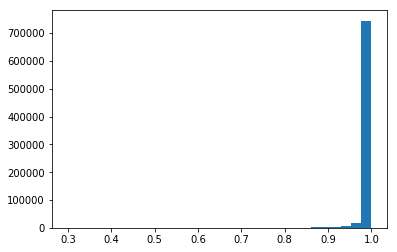

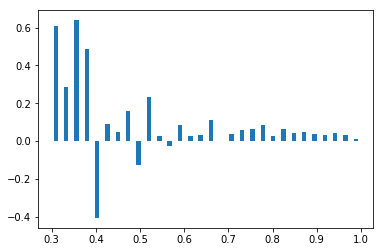

In [57]:
mask = top_k_div_norm_shi2 > 0

fig = plt.figure()
plt.hist(collapse_diff_mhi2[mask], bins = 30)

fig = plt.figure()
hist_1,edge = np.histogram(collapse_diff_mhi2[mask], bins = 30)
hist_2,edge = np.histogram(collapse_diff_mhi2[mask], bins = 30, weights=(loss_shi2[mask] - loss_mhi2[mask]))
middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 0.01)

/home/hschang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


<BarContainer object of 30 artists>

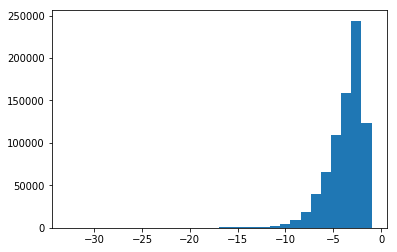

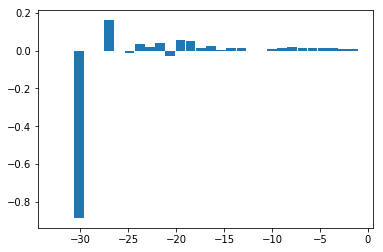

In [49]:

mask = top_k_div_norm_shi2 > 0

fig = plt.figure()
plt.hist(LID_avg_mhi2[mask], bins = 30)

fig = plt.figure()
hist_1,edge = np.histogram(LID_avg_mhi2[mask], bins = 30)
hist_2,edge = np.histogram(LID_avg_mhi2[mask], bins = 30, weights=(loss_shi2[mask] - loss_mhi2[mask]))
middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 1)

<BarContainer object of 30 artists>

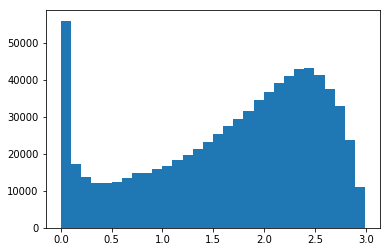

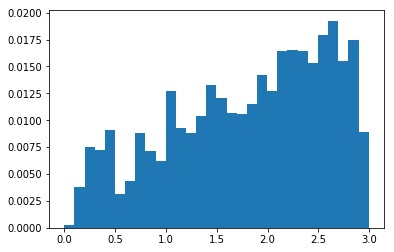

In [54]:

mask = top_k_div_norm_shi2 > 0

fig = plt.figure()
plt.hist(top_entropy_shi2[mask], bins = 30)

fig = plt.figure()
hist_1,edge = np.histogram(top_entropy_shi2[mask], bins = 30)
hist_2,edge = np.histogram(top_entropy_shi2[mask], bins = 30, weights=(loss_shi2[mask] - loss_mhi2[mask]))
middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 0.1)

/home/hschang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


<BarContainer object of 30 artists>

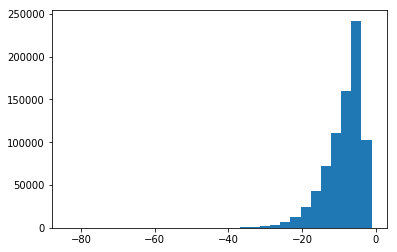

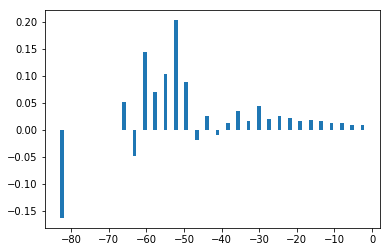

In [50]:
mask = top_k_div_norm_shi2 > 0

fig = plt.figure()
plt.hist(LID_avg_norm_mhi2[mask], bins = 30)

fig = plt.figure()
hist_1,edge = np.histogram(LID_avg_norm_mhi2[mask], bins = 30)
hist_2,edge = np.histogram(LID_avg_norm_mhi2[mask], bins = 30, weights=(loss_shi2[mask] - loss_mhi2[mask]))
middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 1)

<BarContainer object of 30 artists>

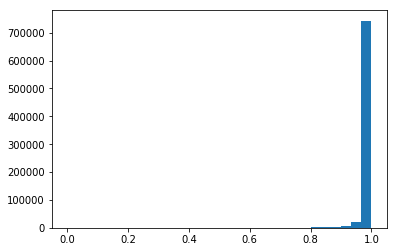

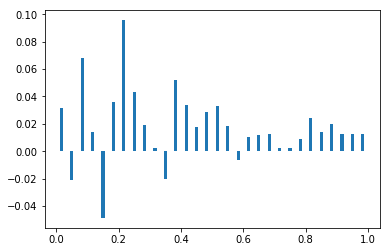

In [9]:
mask = top_k_div_norm_shi2 > 0

fig = plt.figure()
plt.hist(collapse_diff_mpi2[mask], bins = 30)

fig = plt.figure()
hist_1,edge = np.histogram(collapse_diff_mpi2[mask], bins = 30)
hist_2,edge = np.histogram(collapse_diff_mpi2[mask], bins = 30, weights=(loss_shi2[mask] - loss_mpi2[mask]))
middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 0.01)

<BarContainer object of 30 artists>

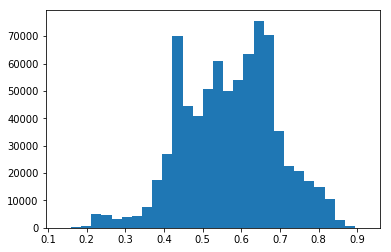

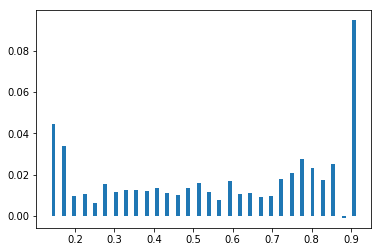

In [10]:
#fig = plt.figure()
#plt.hist(reconstruction_err_shi2, bins = 30)
fig = plt.figure()
plt.hist(eig_vals_min_norm_shi2[mask]/top_k_div_norm_shi2[mask], bins = 30)

fig = plt.figure()
#mask = loss_sc - loss_mc > 0
mask = loss_shi2 > 0
#hist_1,edge = np.histogram(reconstruction_err_shi2[mask]/top_k_div_norm_shi2[mask], bins = 30)
#hist_2,edge = np.histogram(reconstruction_err_shi2[mask]/top_k_div_norm_shi2[mask], bins = 30, weights=(loss_shi2[mask] - loss_mhi2[mask]))
#hist_1,edge = np.histogram(eig_vals_min_norm_shi2[mask]/top_k_div_norm_shi2[mask], bins = 30)
#hist_2,edge = np.histogram(eig_vals_min_norm_shi2[mask]/top_k_div_norm_shi2[mask], bins = 30, weights=(loss_shi2[mask] - loss_mhi2[mask]))
hist_1,edge = np.histogram(eig_vals_min_norm_shi2[mask]/top_k_div_norm_shi2[mask], bins = 30)
hist_2,edge = np.histogram(eig_vals_min_norm_shi2[mask]/top_k_div_norm_shi2[mask], bins = 30, weights=(loss_shi2[mask] - loss_mpi2[mask]))

#hist_1,edge = np.histogram(eig_vals_min_norm_shi2[mask], bins = 30)
#hist_2,edge = np.histogram(eig_vals_min_norm_shi2[mask], bins = 30, weights=(loss_shi2[mask] - loss_mhi2[mask]))

middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 0.01)

In [59]:
mask1 = top_k_div_norm_shi2 > 0
#mask2 = collapse_diff_myi2 < 0.85
#mask2 = collapse_diff_mhi2 < 0.85
mask2 = collapse_diff_mpi2 < 0.95

#print(np.sum(mask) / mask.size)
print(np.sum(mask1&mask2) / np.sum(mask1))

#print(np.mean(loss_shi2[mask1] - loss_mhi2[mask1]))
#print(np.mean(loss_shi2[mask1&mask2] - loss_mhi2[mask1&mask2]))
#print(np.mean(loss_shi2[mask1] - loss_mpi2[mask1]))
#print(np.mean(loss_shi2[mask1&mask2] - loss_mpi2[mask1&mask2]))
#print(np.mean(loss_soi2[mask1] - loss_shi2[mask1]))
#print(np.mean(loss_soi2[mask1&mask2] - loss_shi2[mask1&mask2]))
#print(np.mean(loss_myi2[mask1] - loss_mhi2[mask1]))
#print(np.mean(loss_myi2[mask1&mask2] - loss_mhi2[mask1&mask2]))
#print(np.mean(loss_soi2[mask1] - loss_myi2[mask1]))
#print(np.mean(loss_soi2[mask1&mask2] - loss_myi2[mask1&mask2]))
print(np.mean(loss_mhi2[mask1&(~mask2)] - loss_mpi2[mask1&(~mask2)]))
print(np.mean(loss_mhi2[mask1&mask2] - loss_mpi2[mask1&mask2]))

0.03061025641025641
0.0002648387945455133
0.01890323006703989


In [40]:
mask2 = collapse_diff_myi2 < 0.85
print(np.mean(loss_soi2[mask1&(~mask2)] - loss_myi2[mask1&(~mask2)]))
print(np.mean(loss_soi2[mask1&mask2] - loss_myi2[mask1&mask2]))

NameError: name 'loss_soi2' is not defined

In [64]:
mask2 = collapse_diff_mhi2 < 0.95
print(np.sum(mask1&mask2) / np.sum(mask1))
print(np.mean(loss_shi2[mask1&(~mask2)] - loss_mhi2[mask1&(~mask2)]))
print(np.mean(loss_shi2[mask1&mask2] - loss_mhi2[mask1&mask2]))


0.02000897435897436
0.011294849065806205
0.0435719069820228


In [65]:
mask2 = collapse_diff_mhi2 < 0.95
print(np.sum(mask1&mask2) / np.sum(mask1))
print(np.mean(loss_myi2[mask1&(~mask2)] - loss_mhi2[mask1&(~mask2)]))
print(np.mean(loss_myi2[mask1&mask2] - loss_mhi2[mask1&mask2]))

0.02000897435897436
0.002762258618386698
0.019412046053447783


In [63]:
mask2 = collapse_diff_mpi2 < 0.95
print(np.mean(loss_soi2[mask1&(~mask2)] - loss_shi2[mask1&(~mask2)]))
print(np.mean(loss_soi2[mask1&mask2] - loss_shi2[mask1&mask2]))


NameError: name 'loss_soi2' is not defined

In [62]:
mask1 = top_k_div_norm_shi2 > 0
mask2 = eig_vals_min_norm_shi2/top_k_div_norm_shi2 < 0.19

#print(np.sum(mask) / mask.size)
print(np.sum(mask1&mask2) / np.sum(mask1))

print(np.mean(loss_shi2[mask1] - loss_mpi2[mask1]))
print(np.mean(loss_shi2[mask1&mask2] - loss_mpi2[mask1&mask2]))

0.00048333333333333334
0.012776044620506159
0.036588989644106326


In [38]:
#mask1 = top_k_div_norm_shi2 > 0
#mask2 = top_k_div_norm_shi2 > 0.8
#mask2 = top_k_div_norm_soi2 > 0.8
#mask2 = top_k_div_norm_myi2 > 0.8
#mask2 = top_k_div_norm_mhi2 > 0.8
mask2 = top_k_div_norm_mpi2 > 0.8

#mask2 = collapse_diff_myi2 < 0.85
#mask2 = collapse_diff_mhi2 < 0.85
#mask2 = collapse_diff_mpi2 < 0.85

#print(np.sum(mask) / mask.size)
print(np.sum(mask1&mask2) / np.sum(mask1))

#print(np.mean(loss_mhi2[mask1] - loss_mpi2[mask1]))
#print(np.mean(loss_mhi2[mask1&mask2] - loss_mpi2[mask1&mask2]))

print(np.mean(loss_shi2[mask1&(~mask2)] - loss_mpi2[mask1&(~mask2)]))
print(np.mean(loss_shi2[mask1&mask2] - loss_mpi2[mask1&mask2]))

#print(np.mean(loss_shi2[mask1] - loss_mhi2[mask1]))
#print(np.mean(loss_shi2[mask1&mask2] - loss_mhi2[mask1&mask2]))

#print(np.mean(loss_soi2[mask1] - loss_myi2[mask1]))
#print(np.mean(loss_soi2[mask1&mask2] - loss_myi2[mask1&mask2]))

#print(np.mean(loss_soi2[mask1] - loss_shi2[mask1]))
#print(np.mean(loss_soi2[mask1&mask2] - loss_shi2[mask1&mask2]))

#print(np.mean(loss_myi2[mask1] - loss_mhi2[mask1]))
#print(np.mean(loss_myi2[mask1&mask2] - loss_mhi2[mask1&mask2]))




0.09769230769230769
0.012776044620506159
0.026439818867975962


In [37]:
mask2 = top_k_div_norm_mhi2 > 0.8
print(np.mean(loss_shi2[mask1&(~mask2)] - loss_mhi2[mask1&(~mask2)]))
print(np.mean(loss_shi2[mask1&mask2] - loss_mhi2[mask1&mask2]))


0.010789663037343732
0.022354393368896684


In [35]:
mask2 = top_k_div_norm_mhi2 > 0.8
print(np.mean(loss_myi2[mask1&(~mask2)] - loss_mhi2[mask1&(~mask2)]))
print(np.mean(loss_myi2[mask1&mask2] - loss_mhi2[mask1&mask2]))


0.0025033116964517095
0.008452299634522212


In [33]:
#mask2 = top_k_div_norm_mhi2 > 0.8
mask2 = top_k_div_norm_mpi2 > 0.8
print(np.mean(loss_mhi2[mask1&(~mask2)] - loss_mpi2[mask1&(~mask2)]))
print(np.mean(loss_mhi2[mask1&mask2] - loss_mpi2[mask1&mask2]))


0.0006250002946254058
0.0027783370395041388


In [ ]:
fig = plt.figure()
plt.hist(top_k_div_norm_myi2, bins = 50)

<BarContainer object of 50 artists>

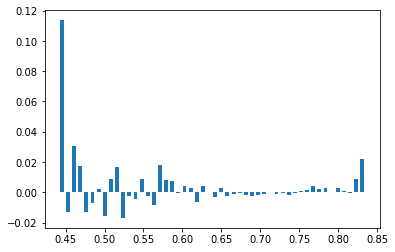

In [32]:
fig = plt.figure()
hist_1,edge = np.histogram(top_k_div_norm_mhi2, bins = 50)
hist_2,edge = np.histogram(top_k_div_norm_mhi2, bins = 50, weights=(loss_mhi2 - loss_mpi2))
middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 0.005)
#plt.xlim(0.65, 0.845)

In [ ]:
fig = plt.figure()
hist_1,edge = np.histogram(top_k_div_norm_shi2, bins = 50)
hist_2,edge = np.histogram(top_k_div_norm_shi2, bins = 50, weights=(loss_shi2 - loss_mpi2))
middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 0.005)
plt.xlim(0.65, 0.845)

In [ ]:
fig = plt.figure()
hist_1,edge = np.histogram(top_k_div_norm_shi2, bins = 50)
hist_2,edge = np.histogram(top_k_div_norm_shi2, bins = 50, weights=(loss_shi2 - loss_mhi2))
middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 0.005)
plt.xlim(0.65, 0.845)

In [ ]:
fig = plt.figure()
hist_1,edge = np.histogram(top_k_div_norm_myi2, bins = 50)
hist_2,edge = np.histogram(top_k_div_norm_myi2, bins = 50, weights=(loss_myi2 - loss_mhi2))
middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 0.005)
plt.xlim(0.65, 0.845)

In [ ]:
fig = plt.figure()
hist_1,edge = np.histogram(top_k_div_norm_soi2, bins = 50)
hist_2,edge = np.histogram(top_k_div_norm_soi2, bins = 50, weights=(loss_soi2 - loss_shi2))
middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 0.005)
plt.xlim(0.65, 0.845)

In [ ]:
fig = plt.figure()
hist_1,edge = np.histogram(top_k_div_norm_soi2, bins = 50)
hist_2,edge = np.histogram(top_k_div_norm_soi2, bins = 50, weights=(loss_soi2 - loss_myi2))
middle_point = (edge[:-1] + edge[1:])/2
plt.bar(middle_point, hist_2 / hist_1, 0.005)
plt.xlim(0.65, 0.845)